## Observations and Insights

1. The Capomulin treatment decreases the tumor volume over time for Mouse b128.

2. The Capomulin and Ramicane treatments have the smaller sample SEM, indicating that their mean is closer to the population mean. 

3. the Box plot of the Final Tumor Volume shows that the Infubinol treatment has an outlier.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
results = pd.merge(mouse_metadata,study_results)
results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Tumor Volume (mm3)
regimen = results.groupby("Drug Regimen")

tumor_mean = regimen["Tumor Volume (mm3)"].mean()
tumor_med = regimen["Tumor Volume (mm3)"].median()
tumor_var = regimen["Tumor Volume (mm3)"].var()
tumor_std = regimen["Tumor Volume (mm3)"].std()
tumor_sem = regimen["Tumor Volume (mm3)"].sem()

summary_tumor = pd.DataFrame({"Mean" : tumor_mean,
                             "Median" : tumor_med,
                            "Variance" : tumor_var,
                            "Standard deviation" : tumor_std,
                            "SEM" : tumor_med})

summary_tumor["Mean"] = summary_tumor["Mean"].map("{:.2f}".format)
summary_tumor["Median"] = summary_tumor["Median"].map("{:.2f}".format)
summary_tumor["Variance"] = summary_tumor["Variance"].map("{:.2f}".format)
summary_tumor["Standard deviation"] = summary_tumor["Standard deviation"].map("{:.2f}".format)
summary_tumor["SEM"] = summary_tumor["SEM"].map("{:.2f}".format)

summary_tumor

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,41.56
Ceftamin,52.59,51.78,39.29,6.27,51.78
Infubinol,52.88,51.82,43.13,6.57,51.82
Ketapril,55.24,53.70,68.55,8.28,53.70
Naftisol,54.33,52.51,66.17,8.13,52.51
Placebo,54.03,52.29,61.17,7.82,52.29
Propriva,52.32,50.85,42.35,6.51,50.85
Ramicane,40.22,40.67,23.49,4.85,40.67
Stelasyn,54.23,52.43,59.45,7.71,52.43


## Bar plots

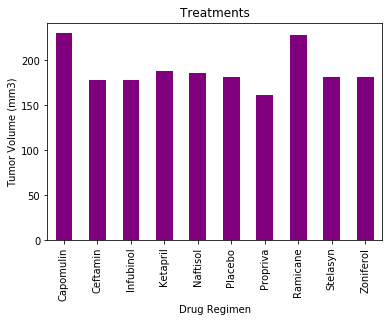

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

data_points = regimen['Drug Regimen'].count()

data_points.plot(kind='bar', facecolor="purple", width = 0.5)

plt.title('Treatments')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

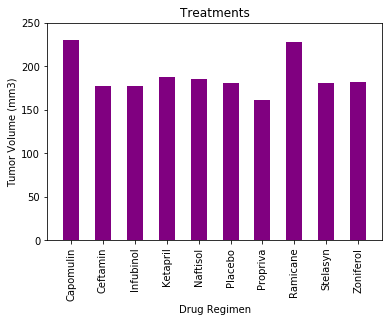

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = regimen.groups.keys()
x_axis 

plt.bar(x_axis, data_points, facecolor="purple", width = 0.5)
plt.title("Treatments")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data_points)+20)
plt.xticks(rotation = 90)

## Pie plots

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = pd.DataFrame(results["Sex"].value_counts())

gender

,Sex
Male,958
Female,935


Text(0.5, 1.0, 'Distribution of female versus male mice')

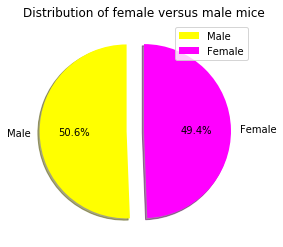

In [9]:
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 935]

# The colors of each section of the pie chart
colors = ["yellow", "magenta"]

# Tells matplotlib to seperate the sections 
explode = (0.2,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend()
plt.title("Distribution of female versus male mice")

/Users/esthervillarreal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Distribution of female versus male mice')

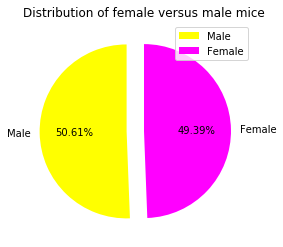

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = pd.DataFrame(results["Sex"].value_counts())
labels = ["Male", "Female"]
colors = ["yellow", "magenta"]


explode = (.2,0)
plt.pie(gender, explode=explode, colors=colors, labels=labels, autopct="%1.2f%%", shadow=False, startangle=90)
plt.legend()
plt.title('Distribution of female versus male mice')

## Quartiles, outliers and boxplots

In [11]:
#Most promising treatment.

final_tumor_vol = results.groupby(['Drug Regimen', 'Mouse ID'])
final_num = final_tumor_vol['Tumor Volume (mm3)'].last()
final_tumor_vol_summary = pd.DataFrame({'Final Tumor Volume (mm3)': final_num})
final_tumor_vol_summary.reset_index()

,Drug Regimen,Mouse ID,Final Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
244,Zoniferol,q633,70.827796
245,Zoniferol,s337,62.109651
246,Zoniferol,w140,47.717952
247,Zoniferol,w575,68.401286


In [13]:
#Four most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
results_capomulin = final_tumor_vol_summary.loc['Capomulin']
results_ramicane = final_tumor_vol_summary.loc['Ramicane']
results_infubinol = final_tumor_vol_summary.loc['Infubinol']
results_ceftamin = final_tumor_vol_summary.loc['Ceftamin']

In [14]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin

quartiles_capomulin = results_capomulin["Final Tumor Volume (mm3)"].quantile([0.25,0.5,.75])
lowerq_capomulin = round(quartiles_capomulin[0.25],2)
upperq_capomulin = round(quartiles_capomulin[0.75],2)
median_capomulin = round(quartiles_capomulin[0.5],2)
iqr_capomulin = round(upperq_capomulin-lowerq_capomulin,2)

print(f"For Capomulin: ")
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq_capomulin}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq_capomulin}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr_capomulin}")
print(f"The the median of Tumor Volume (mm3) is: {median_capomulin} ")

lower_bound_capomulin = round(lowerq_capomulin - (1.5*iqr_capomulin),3)
upper_bound_capomulin = round(upperq_capomulin + (1.5*iqr_capomulin),3)
print(f"Values below {lower_bound_capomulin} could be outliers.")
print(f"Values above {upper_bound_capomulin} could be outliers.")

print("-------------------------------------------------")

#Ramicane
quartiles_ramicane = results_ramicane["Final Tumor Volume (mm3)"].quantile([0.25,0.5,.75])
lowerq_ramicane = round(quartiles_ramicane[0.25],2)
upperq_ramicane = round(quartiles_ramicane[0.75],2)
median_ramicane = round(quartiles_ramicane[0.5],2)
iqr_ramicane = round(upperq_ramicane-lowerq_ramicane,2)

print(f"For Ramicane: ")
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq_ramicane}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq_ramicane}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr_ramicane}")
print(f"The the median of Tumor Volume (mm3) is: {median_ramicane} ")

lower_bound_ramicane = round(lowerq_ramicane - (1.5*iqr_ramicane),3)
upper_bound_ramicane = round(upperq_ramicane + (1.5*iqr_ramicane),3)
print(f"Values below {lower_bound_ramicane} could be outliers.")
print(f"Values above {upper_bound_ramicane} could be outliers.")

print("-------------------------------------------------")

#Infubinol
quartiles_infubinol = results_infubinol["Final Tumor Volume (mm3)"].quantile([0.25,0.5,.75])
lowerq_infubinol = round(quartiles_infubinol[0.25],2)
upperq_infubinol = round(quartiles_infubinol[0.75],2)
median_infubinol = round(quartiles_infubinol[0.5],2)
iqr_infubinol = round(upperq_infubinol-lowerq_infubinol,2)

print(f"For Infubinol: ")
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq_infubinol}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq_infubinol}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr_infubinol}")
print(f"The the median of Tumor Volume (mm3) is: {median_infubinol} ")

lower_bound_infubinol = round(lowerq_infubinol - (1.5*iqr_infubinol),3)
upper_bound_infubinol = round(upperq_infubinol + (1.5*iqr_infubinol),3)
print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")

print("-------------------------------------------------")

#Ceftamin
quartiles_ceftamin = results_ceftamin["Final Tumor Volume (mm3)"].quantile([0.25,0.5,.75])
lowerq_ceftamin = round(quartiles_ceftamin[0.25],2)
upperq_ceftamin = round(quartiles_ceftamin[0.75],2)
median_ceftamin = round(quartiles_ceftamin[0.5],2)
iqr_ceftamin = round(upperq_ceftamin-lowerq_ceftamin,2)

print(f"For Ceftamin: ")
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq_ceftamin}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq_ceftamin}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr_ceftamin}")
print(f"The the median of Tumor Volume (mm3) is: {median_ceftamin} ")

lower_bound_ceftamin = round(lowerq_ceftamin - (1.5*iqr_ceftamin),3)
upper_bound_ceftamin = round(upperq_ceftamin + (1.5*iqr_ceftamin),3)
print(f"Values below {lower_bound_ceftamin} could be outliers.")
print(f"Values above {upper_bound_ceftamin} could be outliers.")

print("-------------------------------------------------")

For Capomulin: 
The lower quartile of Tumor Volume (mm3) is: 32.38
The upper quartile of Tumor Volume (mm3) is: 40.16
The interquartile range of Tumor Volume (mm3) is: 7.78
The the median of Tumor Volume (mm3) is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
-------------------------------------------------
For Ramicane: 
The lower quartile of Tumor Volume (mm3) is: 31.56
The upper quartile of Tumor Volume (mm3) is: 40.66
The interquartile range of Tumor Volume (mm3) is: 9.1
The the median of Tumor Volume (mm3) is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
-------------------------------------------------
For Infubinol: 
The lower quartile of Tumor Volume (mm3) is: 54.05
The upper quartile of Tumor Volume (mm3) is: 65.53
The interquartile range of Tumor Volume (mm3) is: 11.48
The the median of Tumor Volume (mm3) is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
----------

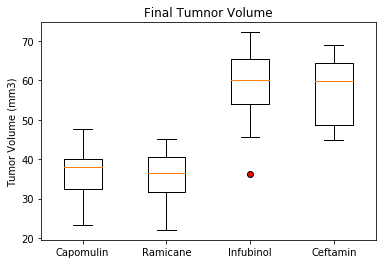

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title("Final Tumnor Volume")
ax.set_ylabel("Tumor Volume (mm3)")
red_outliers = dict(markerfacecolor='r', marker='o')
ax.boxplot([results_capomulin["Final Tumor Volume (mm3)"], 
             results_ramicane["Final Tumor Volume (mm3)"], 
             results_infubinol["Final Tumor Volume (mm3)"],
             results_ceftamin["Final Tumor Volume (mm3)"]], flierprops=red_outliers)
positions = (1, 2, 3, 4)
labels = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")
plt.xticks(positions, labels)
plt.show()

## Line and scatter plots

Text(0.5, 0, 'Timepoint (days)')

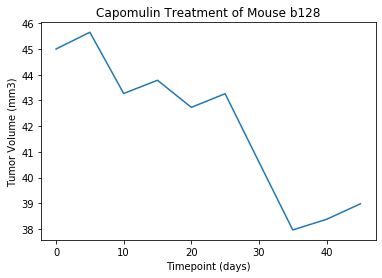

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_results = results.set_index('Mouse ID')
mouse_results.head()
one_mouse = mouse_results.loc['b128']

time = one_mouse['Timepoint']
vol = one_mouse['Tumor Volume (mm3)']

plt.plot(time,vol)
plt.title("Capomulin Treatment of Mouse b128")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')

Text(0.5, 0, 'Weight (g)')

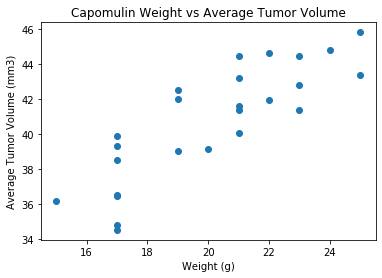

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_vol = final_tumor_vol['Tumor Volume (mm3)'].mean()
first_weight = final_tumor_vol['Weight (g)'].first()
avg_tumor_vol_summary = pd.DataFrame({'Avg Tumor Volume (mm3)': avg_vol,
                                      'Weight (g)': first_weight})
avg_tumor_vol_summary.reset_index()

scatter_data = avg_tumor_vol_summary.loc['Capomulin']

mouse_weight = scatter_data['Weight (g)']
avg_vols = scatter_data['Avg Tumor Volume (mm3)']

plt.scatter(mouse_weight, avg_vols)
plt.title("Capomulin Weight vs Average Tumor Volume")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

The correlation coefficient between both factors is 0.84.


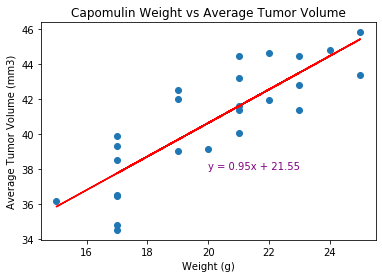

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_vols)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}.")
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_vols)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_vols)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=10,color="purple")
plt.title("Capomulin Weight vs Average Tumor Volume")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()